In [ ]:
!pip install sktime

     |████████████████████████████████| 5.7MB 5.4MB/s 
     |████████████████████████████████| 22.2MB 1.6MB/s 
     |████████████████████████████████| 9.5MB 51.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 2.1MB 19.2MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [77]:
from fbprophet import Prophet
from sktime.datasets import load_shampoo_sales
import pandas as pd
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon

In [ ]:
df = load_shampoo_sales()
#df.columns = ["ds", 'y']
#df.head()
df

Period
1991-01    266.0
1991-02    145.9
1991-03    183.1
1991-04    119.3
1991-05    180.3
1991-06    168.5
1991-07    231.8
1991-08    224.5
1991-09    192.8
1991-10    122.9
1991-11    336.5
1991-12    185.9
1992-01    194.3
1992-02    149.5
1992-03    210.1
1992-04    273.3
1992-05    191.4
1992-06    287.0
1992-07    226.0
1992-08    303.6
1992-09    289.9
1992-10    421.6
1992-11    264.5
1992-12    342.3
1993-01    339.7
1993-02    440.4
1993-03    315.9
1993-04    439.3
1993-05    401.3
1993-06    437.4
1993-07    575.5
1993-08    407.6
1993-09    682.0
1993-10    475.3
1993-11    581.3
1993-12    646.9
Freq: M, Name: Number of shampoo sales, dtype: float64

In [ ]:
df.index

PeriodIndex(['1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
             '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
             '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
             '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
             '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
             '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'],
            dtype='period[M]', name='Period', freq='M')

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa6e8798e80>)

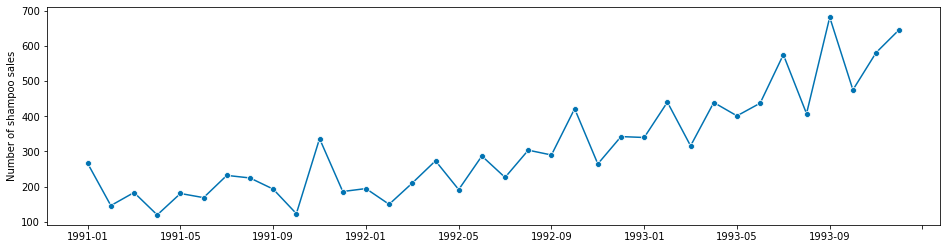

In [ ]:
plot_series(df)

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [ ]:
y_train, y_test = temporal_train_test_split(df, test_size= 7)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa6e6cc7a58>)

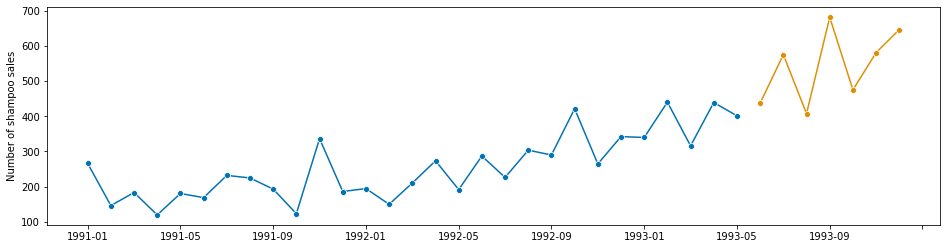

In [ ]:
plot_series(y_train, y_test)

In [ ]:
arima_1_frr = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 2))

In [ ]:
arima_1_frr.fit(y_train)

ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 2))

In [ ]:
arima_1_frr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 2)   Log Likelihood                -152.469
Date:                            Wed, 03 Feb 2021   AIC                            314.938
Time:                                    16:29:21   BIC                            321.599
Sample:                                         0   HQIC                           316.975
                                             - 29                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.0239     10.698      2.339      0.019       4.057      45.991
ar.L1         -0.8742      0.121     -7.232      0.000      -1.111      -0.637
ma.L1         -0.1615      0.255     -0.634      0.526      -0.661       0.338
ar.S.L2       -0.5676      0.169     -3.358      0.001      -0.899      -0.236
sigma2      2951.5149   1087.106      2.715      0.007     820.827    5082.203
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.60   Prob(JB):                         0.63
Heteroskedasticity (H):               0.68   Skew:                             0.24
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import pmdarima as pm

auto_arima = pm.auto_arima(y_train,
                      seasonal=True, m=12,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=3, max_q=3,
                      max_P=3, max_Q=3,
                      trace=True)

# Print model summary
print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=203.603, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=208.125, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=201.025, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=202.111, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=200.929, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=203.009, Time=0.46 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=202.582, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=200.571, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=201.582, Time=0.19 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=200.329, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=202.121, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=204.136, Time=0.31 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AI

In [ ]:
model = ARIMA(order=(0, 1, 1), seasonal_order=(0, 1, 0, 12))

In [ ]:
y_pred = auto_arima.predict(n_periods=7, X=y_test)
y_pred

array([451.82721692, 390.82721692, 468.42721692, 454.72721692,
       586.42721692, 429.32721692, 507.12721692])

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa6d423ecf8>)

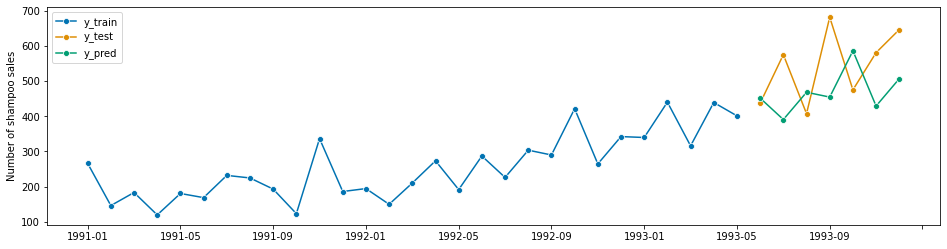

In [ ]:
plot_series(y_train, y_test, pd.Series(y_pred, index=y_test.index), labels=['y_train','y_test','y_pred'])

In [68]:
arima_1_frr = ARIMA(order=(0, 1, 1), seasonal_order=(0, 1, 0, 12))

In [69]:
arima_1_frr.fit(y_train)

ARIMA(order=(0, 1, 1), seasonal_order=(0, 1, 0, 12))

In [70]:
arima_1_frr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   29
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -95.847
Date:                             Wed, 03 Feb 2021   AIC                            197.694
Time:                                     16:56:36   BIC                            200.012
Sample:                                          0   HQIC                           197.813
                                              - 29                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.9357      6.228      2.077      0.038       0.728      25.143
ma.L1         -0.9970     25.218     -0.040      0.968     -50.424      48.430
sigma2      7885.6635   1.99e+05      0.040      0.968   -3.82e+05    3.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.82   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.05   Prob(JB):                         0.84
Heteroskedasticity (H):               0.97   Skew:                            -0.28
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

order = (p, d, q)

seasonal_order = (P, D, Q, sp)

sp = 12


$z_t \sim ARIMA(0, 1, 1) - (0, 1, 0)[12]$

$(1 - 0L)) z_t = 12.9357 + (1 + -0.9970 L)u_t$


In [78]:
horizon = ForecastingHorizon(y_test.index, is_relative=False)

In [80]:
arima_prediction = arima_1_frr.predict(horizon)
arima_prediction, arima_prediction_int = arima_1_frr.predict(horizon, return_pred_int=True)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee40e06208>)

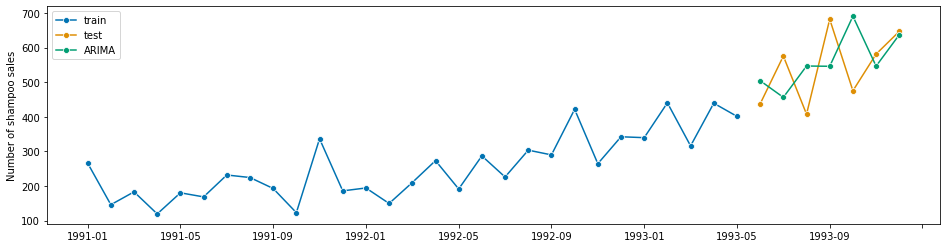

In [82]:
plot_series(y_train, y_test, arima_prediction, labels=['train', 'test', 'ARIMA'])